![Texto alternativo](https://laserud.co/wp-content/uploads/2020/05/cropped-LOGOLASER-1.jpg "Grupo LASER")

# Algoritmo de regresión lineal

Es un modelo muy popular de regresión utilizado cuando la correlación de variables es alta; para ello se suelen utilizar los coeficientes de variación de Pearson, Rho de Spearman y Tau de Kendall. La filosofia del algoritmo de regresión lineal toma como base la alta correlación de variables para afirmar que la variable dependiente puede ser descrita por algun tratamiento lineal sobre la variable independiente, por medio de la aplicación de las operaciones de producto por escalar y adición obteniendo una forma:

Y = $\sum_{i=1}^{n} A_i*X_i + C$

En el caso de una sola variable independiente involucrada en la regresión nos referiremos al caso de regresión lineal simple y cuando el valor es de dos o mas variables nos referiremos a una regresión lineal multiple, para efectos de la implementación del algoritmo es muy similar en ambos casos; así que manos a la obra.

En el siguiente fragmento de código encontraremos como instalar la dependencia **sklearn** la cual contiene la implementación de los algoritmos clásicos de ML incluyendo el algoritmo de Regresión Lineal; si quieres conocer a mayor detalle la implementación de la misma puedes entrar a la documentación de ella <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">aquí</a>

In [1]:
!pip install sklearn

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Ahora vamos a agregar la librería que contiene el modelo de regresión lineal y la librería datetime, puesto que vamos a crear una función **inear_regression_algorithm** que recibe como parametro las variables **iterations, train_data, x_variables, y_variable** que hacen referencia la cantidad máxima de iteraciones para la convergencia del modelo, el conjunto de datos de entrenamiento, los nombres de las columnas asociadas a las variables independientes y la variable dependiente (razón de ser de la predicción) respectivamente; la cual debe retornar el modelo entrenado y el tiempo en milisegundos que tomo dicho entrenamiento.

In [2]:
from sklearn.linear_model import LinearRegression 

import datetime

def linear_regression_algorithm(train_data, x_variables, y_variable):
    x_train = train_data[x_variables]
    y_train = train_data[[y_variable]]
    
    start_time = datetime.datetime.now()
    
    model = LinearRegression()
    model.fit(x_train,y_train.values.ravel())
    
    elapsed_time = datetime.datetime.now() - start_time
    
    return model, (elapsed_time.total_seconds() * 1000)


En los siguientes fragmentos de código se procede rápidamente con la carga, preparación y análisis exploratorio de los datos correspondientes a <a href="https://archive.ics.uci.edu/ml/datasets/Computer%2BHardware" target="_blank">
Computer Hardware Data Set</a>; para mas información sobre el detalle y paso a paso de los procedimientos realizados puedes dirigirte a la sección de <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/PreparacionDatos.ipynb" target="_blank">Preparación de los datos</a> y  <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/AnalisisExploratorio.ipynb" target="_blank">Ánalisis exploratorio</a>

In [3]:
!pip install pandas
!pip install requests

import pandas as pd
import requests

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data"
data_stream = requests.get(url).content

import io

headers = ['VENDOR_NAME', 'MODEL_NAME', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
dataset=pd.read_csv(io.StringIO(data_stream.decode('utf-8')), header=None, names = headers)

dataset

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


,VENDOR_NAME,MODEL_NAME,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [4]:
x_columns =  ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']
target_column_name = 'ERP'
y_columns = [target_column_name]

Ahora vamos a definir el conjunto de datos que usaremos para el entrenamiento y validación del modelo de regresión lineal con el siguiente fragmento de código:

In [5]:
# El primer parámetro nos va a servir para tomar X porcentaje de los datos por ejemplo 0.6 quiere decir el 60% de los datos
train_data=dataset.sample(frac=0.6)
# Lo que se hace aca es tomar los elementos del conjunto de datos que no se encuentran en el conjunto de entrenamiento
test_data=dataset.drop(train_data.index)

Para el análisis estadístico se excluiran las observaciones (registros) que se encuentren en el conjunto de datos de validación; ya que en ocasiones nos podrían decir **X** es la base de datos de entrenamiento, y **Y** es la base de datos de validación

In [6]:
train_data.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,230.720000,2937.184000,11485.008000,23.392000,4.784000,17.232000,102.136000,99.464000
std,293.835004,4359.614537,12268.977339,35.351894,7.714235,25.312287,163.969772,165.502877
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,4.000000,24.000000,26.000000
50%,112.000000,1000.000000,8000.000000,8.000000,2.000000,8.000000,45.000000,44.000000
75%,300.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,106.000000,88.000000
max,1500.000000,32000.000000,64000.000000,160.000000,52.000000,176.000000,1144.000000,1238.000000


In [7]:
# Coeficiente de correlación de Pearson
train_data.corr(method='pearson')

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.328746,-0.393040,-0.362653,-0.302319,-0.287567,-0.310499,-0.290167
MMIN,-0.328746,1.000000,0.789345,0.599026,0.498683,0.298434,0.850530,0.856179
MMAX,-0.393040,0.789345,1.000000,0.616541,0.588204,0.527373,0.871895,0.912592
CACH,-0.362653,0.599026,0.616541,1.000000,0.633586,0.455261,0.689373,0.661174
CHMIN,-0.302319,0.498683,0.588204,0.633586,1.000000,0.622284,0.636041,0.624161
CHMAX,-0.287567,0.298434,0.527373,0.455261,0.622284,1.000000,0.574322,0.568706
PRP,-0.310499,0.850530,0.871895,0.689373,0.636041,0.574322,1.000000,0.966731
ERP,-0.290167,0.856179,0.912592,0.661174,0.624161,0.568706,0.966731,1.000000


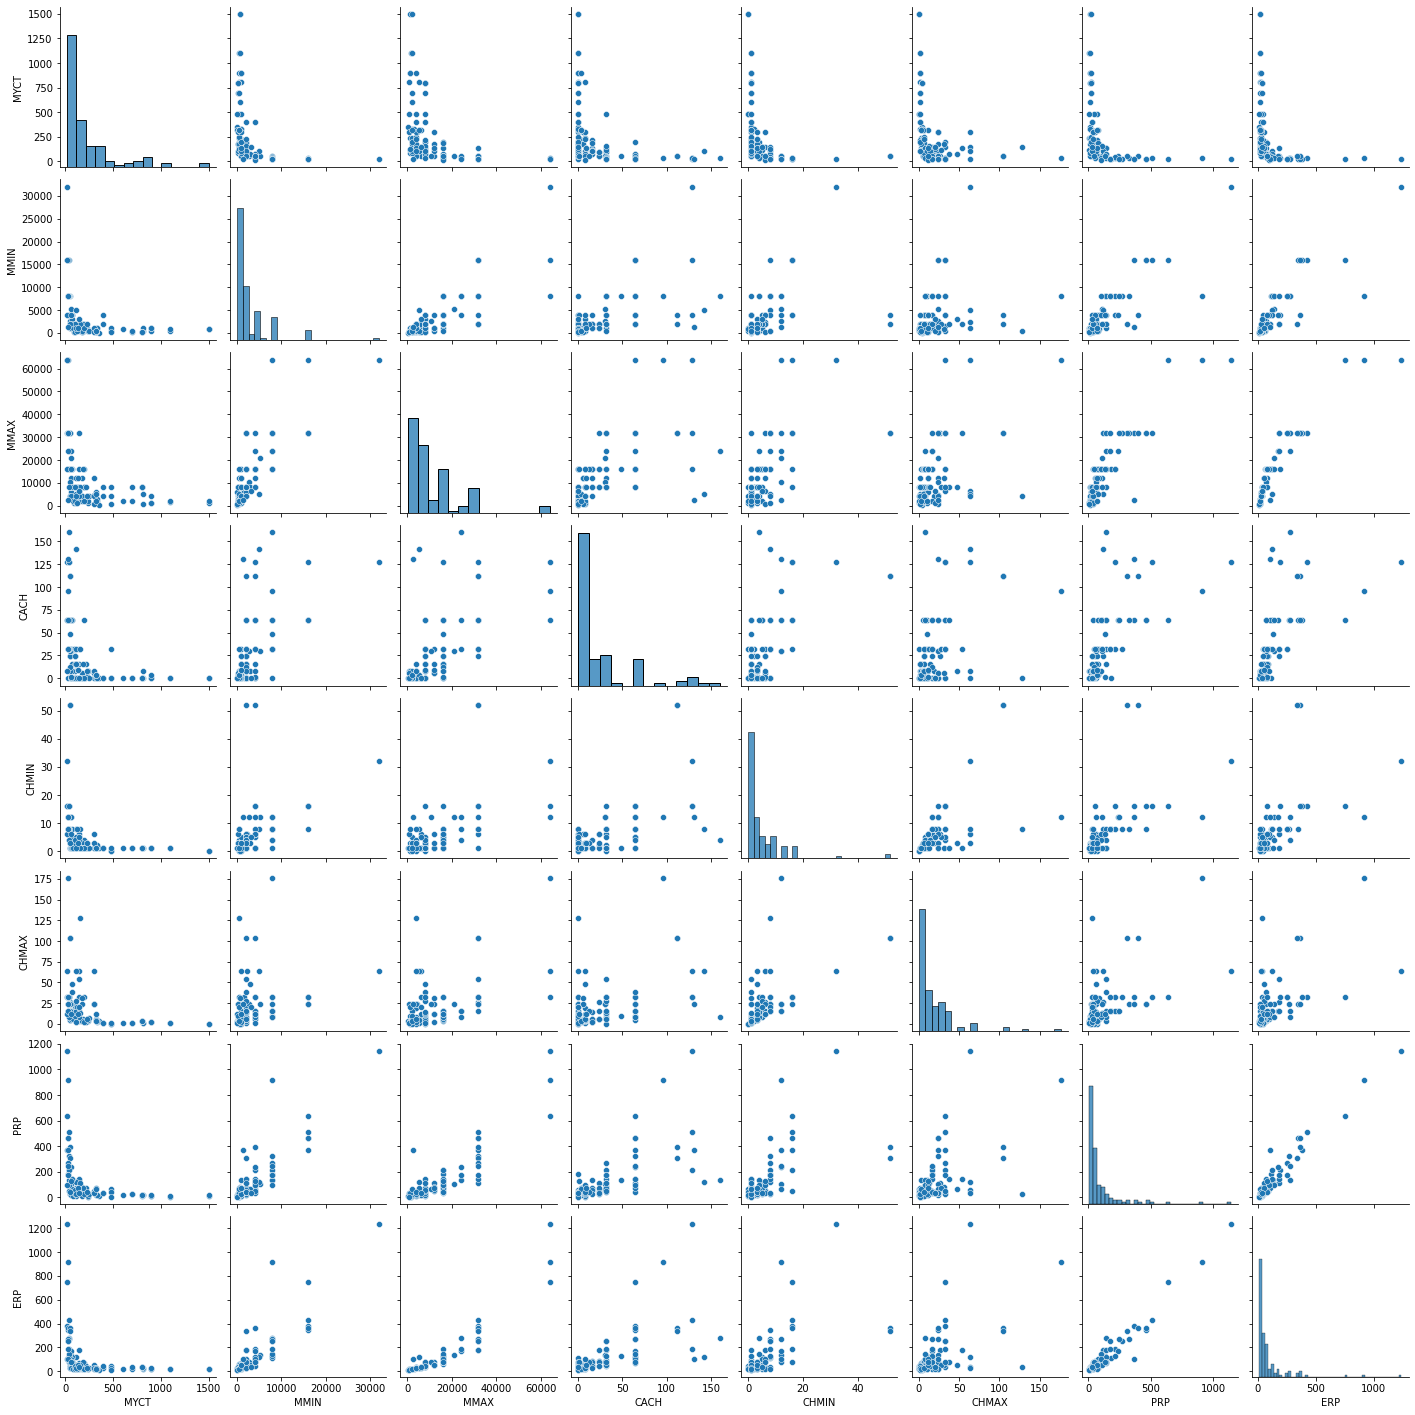

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(train_data)
plt.show()

Como se puede observar en los pasos anteriores como en el que se encontro el coeficiente de correlación de Pearson entre las variables, y en las graficas. Teniendo en cuenta que la variable ERP es la variable sobre la cual queremos enfocar el análisis podemos afirmar:
1. Dado que el coeficiente de correlación de Pearson entre la variabla PRP y ERP es 0.975190, entonces podemos afirmar que la variable ERP puede ser representada en terminos de un modelo de regresión lineal simple con la variable PRP.
2. Si quisieramos representar el modelo de regresion lineal multivariado, podriamos ademas de la variable PRP podriamos utilizar las variables MMIN y MMAX las cuales poseen altos coeficientes de correlación 0.835403	y 0.915207 respectivamente.
3. No obstante podriamos a modo de practica hacer la regresion lineal con la totalidad de atributos, tambien excluyendo la variable MYCT; dado que el coeficiente de correlación de dicha variable es muy bajo.


**Nota.** Es importante recordar los pasos para el procesamiento de datos. Esto aplica para absolutamente todos los métodos que quisieramos utilizar.
* Obtención de los datos
* Preparación de los datos
* Definición del conjunto de datos de entrenamiento (con el que se va a construir el modelo)
* Definición del conjunto de datos de prueba (con el que se validara la confianza del modelo)
* Selección del algoritmo con el que se construye el modelo
* Entrenamiento del modelo
* Validacion del modelo (esto incluye revisar los resultados de la ejecución del modelo con los datos de prueba y la toma de medidas para establecer la confianza del modelo)

Con el siguiente fragmento de código vamos a proceder con el llamado a la funcion **linear_regression_algorithm** definida previamente en esta guía, pasando como parametros:

1. El conjunto de datos de entrenamiento
2. Las los atributos asociados a las variables independientes que se usaran para el entrenamiento del modelo
3. La el nombre del atributo asociado a la variable dependiente que queremos predecir a partir de la información que pueda extraer el algorítmo de las demas variables

In [9]:
# En la siguiente linea vamos a marcar los nombres de las variables independientes
#x_columns = ['PRP', 'MMIN', 'MMAX']
x_columns = ['PRP']
y_column = 'ERP'
model, train_elapsed_time = linear_regression_algorithm(train_data, x_columns, y_column)

Ahora vamos a pasarle al modelo el conjunto de validación y así ver como son las predicciones realizadas.

In [10]:
start_time = datetime.datetime.now()

predictions = model.predict(test_data[x_columns])
elapsed_time = datetime.datetime.now() - start_time
test_elapsed_time = elapsed_time.total_seconds() * 1000
predictions

array([ 193.00525001,  214.47219798,  128.6044061 ,  310.09769348,
        476.95442542,   36.88199205,   38.83353277,   89.57359161,
        134.45902827,   18.34235516,   27.12428842,   73.96126581,
         32.00314024,  267.16379754,   31.02736987,  202.76295363,
         19.31812553,   58.34894002,   38.83353277,   60.30048074,
         11.51196263,   19.31812553,  140.31365045,  252.5272421 ,
         60.30048074,   34.93045132,   42.73661422,   48.59123639,
         36.88199205,   21.26966625,   28.10005879,   33.95468096,
        130.55594682,   64.20356219,  184.22331675,   21.26966625,
        270.09110862,   43.71238458,   21.26966625,   35.90622168,
         32.9789106 ,   48.59123639,   64.20356219,   47.61546603,
         64.20356219,  129.58017646,   19.31812553,   26.14851806,
         43.71238458,   54.44585857,   77.86434726,   15.41504408,
         63.22779183,   38.83353277,   60.30048074,   48.59123639,
         90.54936197,  102.25860632,  270.09110862,  360.83775

Ahora vamos a validar el modelo creando la función **extract_error_measures** que recibe como parametros **expected_test_outputs, predictions** los cuales hacen referencia a los valores esperados de la predicción y los valores resultantes de la predicción del modelo respectivamente; y retorna las variables **test_mean_absolute_error, test_mean_squared_error** las cuales hacen referencia a la medida del error medio absoluto y el error cuadratico medio respectivamente. Los cuales nos ayudan a comprender la efectividad y confianza del modelo.

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def extract_error_measures(expected_test_outputs, predictions):
    test_mean_absolute_error = mean_absolute_error(expected_test_outputs, predictions)
    test_mean_squared_error = mean_squared_error(expected_test_outputs, predictions)
    return test_mean_absolute_error, test_mean_squared_error

Para efectos de presentación de resultados definiremos la variable **algorithm_scores** la cual tiene una estructura de tabla con los campos retornados en la función **extract_error_measures**, junto con el tiempo en milisegundos que tomo la construcción del modelo y la ejecución de todos los elementos de prueba.

In [12]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm','mean_absolute_error', 'mean_squared_error', 'train_elapsed_time', 'test_elapsed_time'])

Ahora vamos a agregarle a la tabla de resultados las medidas de interés tomadas del modelo; para ello llamaremos la función **extract_error_measures**

In [13]:
test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, test_data[y_column])
algorithm_scores.loc[len(algorithm_scores)] = ['Regresión lineal simple Variable PRP', test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [14]:
algorithm_scores

,algorithm,mean_absolute_error,mean_squared_error,train_elapsed_time,test_elapsed_time
0,Regresión lineal simple Variable PRP,22.61042,1429.861499,5.0,6.005


In [15]:
# Definicion funcion para crear varias configuraciones del modelo de regresion lineal multivariado.

def multipleLinearRegressions(train_data, test_data, x_columns, y_column):
    model, train_elapsed_time = linear_regression_algorithm(train_data, x_columns, y_column)
    start_time = datetime.datetime.now()
    predictions = model.predict(test_data[x_columns])
    elapsed_time = datetime.datetime.now() - start_time
    test_elapsed_time = elapsed_time.total_seconds() * 1000
    test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, test_data[y_column])
    algorithm_scores.loc[len(algorithm_scores)] = [' '.join(x_columns), test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [16]:
multipleLinearRegressions(train_data, test_data, ['PRP', 'MMIN'] , 'ERP')
multipleLinearRegressions(train_data, test_data, ['PRP', 'MMIN', 'MMAX'] , 'ERP')
multipleLinearRegressions(train_data, test_data, ['PRP', 'MMIN', 'MMAX', 'CHMIN'] , 'ERP')
multipleLinearRegressions(train_data, test_data, ['PRP', 'MMIN', 'MMAX', 'CHMIN', 'CACH'] , 'ERP')
multipleLinearRegressions(train_data, test_data, ['PRP', 'MMIN', 'MMAX', 'CHMIN', 'CACH', 'CHMAX'] , 'ERP')
multipleLinearRegressions(train_data, test_data, ['PRP', 'MMIN', 'MMAX', 'CHMIN', 'CACH', 'CHMAX', 'MYCT'] , 'ERP')


algorithm_scores

,algorithm,mean_absolute_error,mean_squared_error,train_elapsed_time,test_elapsed_time
0,Regresión lineal simple Variable PRP,22.610420,1429.861499,5.000,6.005
1,PRP MMIN,21.207638,1100.857869,4.001,5.001
2,PRP MMIN MMAX,20.891543,1031.245271,4.001,8.004
3,PRP MMIN MMAX CHMIN,20.785578,1022.754582,5.003,5.000
4,PRP MMIN MMAX CHMIN CACH,20.742700,1102.010971,4.002,5.000
5,PRP MMIN MMAX CHMIN CACH CHMAX,20.752715,1061.308515,5.006,5.996
6,PRP MMIN MMAX CHMIN CACH CHMAX MYCT,20.475599,974.834518,5.003,5.001
